# Пример реализации функций map и reduce на языке python



##### пример задача wordcount.
посчитаем частоты слов в песенке в лесу родилась елочка при помощи map-reduce

In [18]:
text = """
В лесу родилась ёлочка,
В лесу она росла.
Зимой и летом стройная,
Зелёная была.
Метель ей пела песенку:
Спи, ёлочка, бай-бай!
Мороз снежком укутывал:
Смотри, не замерзай!
Трусишка зайка серенький
Под ёлочкой скакал.
Порою волк, сердитый волк,
Рысцою пробегал.
Чу! Снег по лесу частому
Под полозом скрипит.
Лошадка мохноногая
Торопится, бежит.
Везёт лошадка дровеньки,
На дровнях мужичок.
Срубил он нашу ёлочку
Под самый корешок.
Теперь ты здесь, нарядная,
На праздник к нам пришла
И много, много радости
Детишкам принесла.
"""

###### Служебная функция  для разбивки текста на строки и выделения в строках слов

In [44]:
import re
def generate_lines(text):
    word_re = re.compile(r"[а-яё]+")
    lines = text.strip().lower().split("\n")
    result = []
    for line in lines:
        result.append(word_re.findall(line))
    return result

In [45]:
print(generate_lines(text))

[['в', 'лесу', 'родилась', 'ёлочка'], ['в', 'лесу', 'она', 'росла'], ['зимой', 'и', 'летом', 'стройная'], ['зелёная', 'была'], ['метель', 'ей', 'пела', 'песенку'], ['спи', 'ёлочка', 'бай', 'бай'], ['мороз', 'снежком', 'укутывал'], ['смотри', 'не', 'замерзай'], ['трусишка', 'зайка', 'серенький'], ['под', 'ёлочкой', 'скакал'], ['порою', 'волк', 'сердитый', 'волк'], ['рысцою', 'пробегал'], ['чу', 'снег', 'по', 'лесу', 'частому'], ['под', 'полозом', 'скрипит'], ['лошадка', 'мохноногая'], ['торопится', 'бежит'], ['везёт', 'лошадка', 'дровеньки'], ['на', 'дровнях', 'мужичок'], ['срубил', 'он', 'нашу', 'ёлочку'], ['под', 'самый', 'корешок'], ['теперь', 'ты', 'здесь', 'нарядная'], ['на', 'праздник', 'к', 'нам', 'пришла'], ['и', 'много', 'много', 'радости'], ['детишкам', 'принесла']]


#### Эмуляция hadoop

###### !!! внимание !!!
Эта функция эмулирует запуск mapreduce. Она предназначена только для целей отладки и демонстрации парадигмы MapReduce. На реальных проектах работа этой функции будет заменена целым стеком программного обеспечения - hadoop.


Про hadoop можно почитать тут: https://habrahabr.ru/company/dca/blog/268277/

In [48]:
from collections import defaultdict
def run_mapreduce(input, map_fnc, reduce_fnc):
    map_result = defaultdict(lambda: [])
    for obj in input:
        for key, value in map_fnc(obj):
            map_result[key].append(value)
    
    reduce_result = []
    for key in map_result:
        for key, value in reduce_fnc(key, map_result[key]):
            reduce_result.append((key, value))
    return reduce_result

#### функции map и reduce для реализации word_count:

In [49]:
def map_wordcount(line):
    for word in line:
        yield(word, 1)

In [50]:
def reduce_wordcount(word, counts):
    yield word, sum(counts)

#### Запустим наш эмулятор mapreduce и распечатаем 10 самых популярных слова в сортировке по встречаемости

In [51]:
lines = generate_lines(text)
result = run_mapreduce(lines, map_wordcount, reduce_wordcount)

for key, value in sorted(result, key=lambda x: -x[1])[:10]:
    print(key, value)

лесу 3
под 3
в 2
ёлочка 2
и 2
бай 2
волк 2
лошадка 2
на 2
много 2


# Домашнее задание

в рамках домашнего задания необходимо проанализировать 1-й том произведения толстого "война и мир" при помощи mapreduce.

##### скачаем текст

In [53]:
import urllib.request
text_1=urllib.request.urlopen("http://apetrov.me/assets/war_peace_1.txt").read().decode()
print(text_1[:580])

Война и мир. Книга 1
Лев Николаевич Толстой


Война и мир #1
В книгу вошли первый и второй тома романа «Война и мир» – одного из самых знаменитых произведений литературы XIX века.






Том первый





Часть первая





I


– Eh bien, mon prince. G?nes et Lucques ne sont plus que des apanages, des поместья, de la famille Buonaparte. Non, je vous prеviens que si vous ne me dites pas que nous avons la guerre, si vous vous permettez encore de pallier toutes les infamies, toutes les atrocitеs de cet Antichrist (ma parole, j’y crois) – je ne vous conna


#### Задание №1
Найти частоты 5 самых популярных слов в тексте

In [57]:
lines_1 = generate_lines(text_1)
result_1 = run_mapreduce(lines_1, map_wordcount, reduce_wordcount)
for key, value in sorted(result_1, key=lambda x: -x[1])[:30]:
    print(key, value)
    

и 10829
в 5393
не 4556
что 4067
он 3867
на 3402
с 3143
как 2208
я 2089
его 1976
к 1836
то 1689
она 1591
все 1408
но 1332
это 1327
было 1168
сказал 1149
а 1137
так 1107
князь 1054
за 1044
ему 940
по 922
ее 921
из 890
о 863
же 835
был 811
от 807


In [127]:
lines_2 = generate_lines(text_1)
result_2 = run_mapreduce(lines_2, map_wordcount, reduce_wordcount)
# print(sorted(result_2, key=lambda x: -x[1]))
sorted_result_2 = sorted(result_2, key=lambda x: -x[1])
sorted_result_2_short = sorted_result_2[:20]
print(sorted_result_2_short)
for key, value in sorted_result_2[:30]:
    print(key, value)
    

[('и', 10829), ('в', 5393), ('не', 4556), ('что', 4067), ('он', 3867), ('на', 3402), ('с', 3143), ('как', 2208), ('я', 2089), ('его', 1976), ('к', 1836), ('то', 1689), ('она', 1591), ('все', 1408), ('но', 1332), ('это', 1327), ('было', 1168), ('сказал', 1149), ('а', 1137), ('так', 1107)]
и 10829
в 5393
не 4556
что 4067
он 3867
на 3402
с 3143
как 2208
я 2089
его 1976
к 1836
то 1689
она 1591
все 1408
но 1332
это 1327
было 1168
сказал 1149
а 1137
так 1107
князь 1054
за 1044
ему 940
по 922
ее 921
из 890
о 863
же 835
был 811
от 807


#### Задание №2
Найти сколько раз в тексте упоминаются фамилии безухов, ростова, болконский

Подсказка: необходимо модифицировать функцию map_wordcount для того чтобы она учитывала только нужные нам слова.

###### Пример:

In [67]:
leave_only = ['таня', 'мячик']
text = ['наша', 'таня', 'громко', 'плачет', 'уронила','в', 'речку', 'мячик']

for word in text:
    if word in leave_only:
        print(word, 1)
    

таня 1
мячик 1


In [72]:


def map_wordcount_filter(line):
    second_names = ['безухов', 'ростова','болконский']
    for word in line:
        if word in second_names:
            yield(word, 1)

lines_3 = generate_lines(text_1)
result_3 = run_mapreduce(lines_3, map_wordcount_filter, reduce_wordcount)
for key, value in result_3:
    print(key, value)

болконский 70
безухов 14
ростова 120


#### Задание №3 (по желанию)

Это задание стоит выполнять только если у вас уже был опыт программирования на python. 


1) прочитать статью "закон ципфа" на wikipedia
https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%A6%D0%B8%D0%BF%D1%84%D0%B0
    
2) Построить график распределения частот слов в 1-м томе "войны и мир" аналогичный приведенному в статье.
Для визуализации графика воспользоваться библиотекой matplotlib

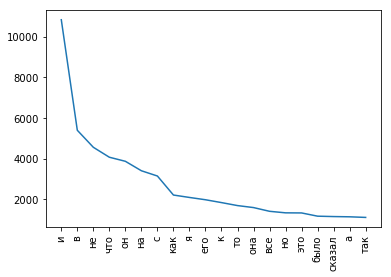

In [128]:
import matplotlib.pyplot as plt
# %matplotlib inline


words = list(zip(*sorted_result_2_short))[0]
counter = list(zip(*sorted_result_2_short))[1]
# print(words, counter)

x=range(len(words))
plot_1=plt.plot(x,counter)
plt.xticks(x, words, rotation='vertical')
plt.show()

<strong>
<ul>
<li>а есть более оптимальные варианты написания кода визуализации?
<li>не нашел в regex возможность ограничить минимальный размер слов - как это можно сделать?
<li>если есть еще что-то, что можно было бы более красиво отразить - пожалуйста, напишите.
</ul>
</strong>